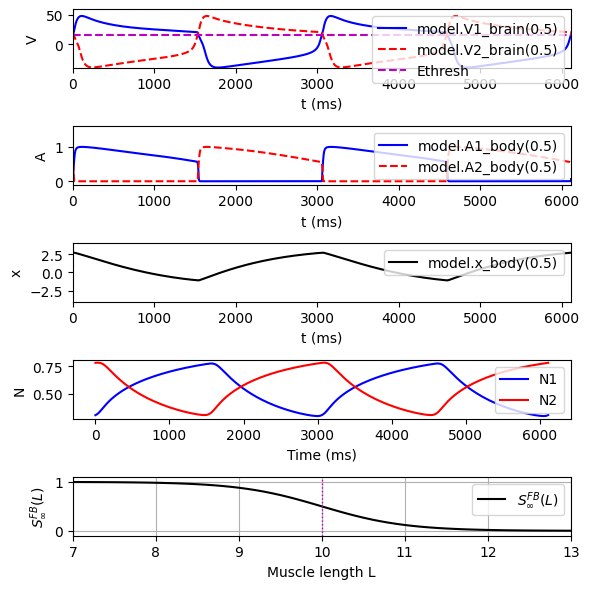

In [2]:

from neuron import h,gui
import matplotlib.pyplot as plt
import numpy as np
model = h.Section(name = 'model')
model.insert('brain')
model.insert('body')
model(0.5).brain._ref_L1Pointer = h._ref_L1_body
model(0.5).brain._ref_L2Pointer=h._ref_L2_body
model(0.5).body._ref_V1Pointer = model(0.5).brain._ref_V1
model(0.5).body._ref_V2Pointer = model(0.5).brain._ref_V2

N1 = h.Vector().record(model(0.5).brain._ref_N1)
N2 = h.Vector().record(model(0.5).brain._ref_N2)
# Record data for plots
V1 = h.Vector().record(model(0.5)._ref_V1_brain)
V2 = h.Vector().record(model(0.5)._ref_V2_brain)
A1 = h.Vector().record(model(0.5)._ref_A1_body)
A2 = h.Vector().record(model(0.5)._ref_A2_body)
x = h.Vector().record(model(0.5)._ref_x_body)
Q=h.Vector().record(model(0.5)._ref_Q_body)
t = h.Vector().record(h._ref_t)
t0=3055
h.load_file('stdrun.hoc')
h.init()
h.cvode.active(1)
h.cvode.atol(1e-4)
h.tstop = 2*t0
h.run()
# Plotting
plt.figure(figsize=(6, 6))

ax1 = plt.subplot(511)
ax1.plot(t, V1, 'b-', label='model.V1_brain(0.5)')
ax1.plot(t, V2, 'r--', label='model.V2_brain(0.5)')
ax1.plot(t, 15 * np.ones(len(t)), '--m', linewidth=1.5, label='Ethresh')
ax1.axis([0, h.tstop, -40, 60])
ax1.set_xlabel('t (ms)')
ax1.set_ylabel('V')
ax1.legend(loc='upper right', frameon=True)

ax2 = plt.subplot(512)
ax2.plot(t, A1, 'b-', label='model.A1_body(0.5)')
ax2.plot(t, A2, 'r--', label='model.A2_body(0.5)')
ax2.axis([0, h.tstop, -0.1, 1.6])
ax2.set_xlabel('t (ms)')
ax2.set_ylabel('A')
ax2.legend(loc='upper right', frameon=True)

ax3 = plt.subplot(513)
ax3.plot(t, x, 'k-', label='model.x_body(0.5)')
ax3.axis([0, h.tstop, -4, 4])
ax3.set_xlabel('t (ms)')
ax3.set_ylabel('x')
ax3.legend(loc='upper right', frameon=True)

ax4 = plt.subplot(514)
ax4.plot(t, N1, 'b-', label='N1')
ax4.plot(t, N2, 'r-', label='N2')
ax4.set_xlabel('Time (ms)')
ax4.set_ylabel('N')
ax4.legend()

ax5=plt.subplot(5, 1, 5)
L0 = 10
Lslope = 1
L = np.arange(7, 13.1, 0.1)
S_fb = 0.5 * (1 - np.tanh((L - L0) / Lslope))
ax5.plot(L, S_fb, '-k', linewidth=1.5, label=r'$S_\infty^{FB}(L)$')
ax5.plot([L0]*len(S_fb), np.linspace(-0.1, 1.1, len(S_fb)), ':m', linewidth=1)
ax5.axis([7, 13, -0.1, 1.1])
ax5.set_xlabel('Muscle length L')
ax5.set_ylabel(r'$S_\infty^{FB}(L)$')
ax5.legend()
ax5.grid(True)

plt.tight_layout()  
plt.show()



 

